
# Designing Chemistry Questions for AI  
*Session 1: Using LLM APIs for Chemical Reasoning*

**What you'll do in this session**
- Understand what a Large Language Model (LLM) is and why chemists might use one.
- Run a **simple, click-to-run demo** that asks a chemistry question.
- Write your **own prompt** and see how wording changes answers.
- Reflect on what to **trust vs. verify** (textbook, PubChem, literature).

> No prior coding needed. We’ll use buttons and text boxes. Code cells are short and explained.



## 🧪 Introduction

**Large Language Models (LLMs)** like GPT-4 can answer questions in natural language. They are trained on vast amounts of text
and can *explain*, *compare*, and *summarize* chemistry topics.

**Quick examples**
- **Q:** What is the chemical formula of water?  
  **A:** H₂O  
- **Q:** Why is water polar?  
  **A:** Oxygen is more electronegative than hydrogen, creating a dipole moment.

**Important mindset**
- LLMs are powerful, but they can **hallucinate** (confident mistakes).  
- You should **verify** numbers and claims with trusted sources (textbook, PubChem, literature).  
- **Prompt wording matters**: adding details or constraints can improve answers.




## ✅ Setup (Instructions)
1. Run the next **Code** cell to install packages and import basics.  
2. Then, add your **OpenAI API key** in the following cell (kept hidden).  
3. If you *don't* have a key, the notebook still runs in **demo mode** with safe placeholder answers.


In [ ]:

# install and import required packages
# - openai → to connect to GPT models
# - ipywidgets → to build interactive buttons, text boxes
!pip -q install openai ipywidgets
!pip install -q openai


import os # handle environment variables (API key storage)
from IPython.display import display, Markdown
import ipywidgets as widgets
from openai import OpenAI # OpenAI client

display(Markdown("> **Setup ready.** Next: add your OpenAI API key."))


> **Setup ready.** Next: add your OpenAI API key.


## 🔑 Add Your OpenAI API Key (Hidden Input)

- Paste your API key in the box and click **Save Key**.  
- Your key is stored only in this session's memory.  
- If this step is skipped, the notebook will return a **demo placeholder** answer instead of contacting the API.


In [ ]:

# Hidden password box for API key + a "Save Key" button
api_key_box = widgets.Password(
    description='API Key:',
    placeholder='sk-...',
    layout=widgets.Layout(width='40%')
)

# Button to save the key

save_btn = widgets.Button(description='Save Key', button_style='primary')

# Status message (will show "✅ saved" or "⚠️ error")

status = widgets.HTML("")

# Function runs when button is clicked

def save_key(_):
    if api_key_box.value.strip():   # if box is not empty
        os.environ["OPENAI_API_KEY"] = api_key_box.value.strip()
        status.value = "<span style='color:green'>✅ Key saved for this session.</span>"
    else:
        status.value = "<span style='color:#B00020'>⚠️ Please paste a valid key.</span>"

# Connect button to function
save_btn.on_click(save_key)

display(widgets.HBox([api_key_box, save_btn]))
display(status)


HTML(value='')


## 🧩 Helper Functions (What this cell does)
The next code cell defines two small helpers:
- `get_client()` — creates an OpenAI client **if** a key is present.
- `ask_llm(prompt, model)` — sends your question to the model and returns the answer.  
  If no key is set, you’ll get a **demo placeholder** so the notebook still works for everyone.


In [ ]:
# Get an OpenAI client object if key is available
def get_client():
    key = os.environ.get("OPENAI_API_KEY")
    return OpenAI(api_key=key) if key else None



# Ask the model a question
def ask_llm(prompt: str, model: str = "gpt-4o-mini") -> str:
    """Ask the model one question. Uses a fallback if no key is set."""
    client = get_client()
    if client is None:
        return ("*(Demo mode: no API key found.)*\n\n"
                "This is a placeholder answer. With a real key, the model would respond here.")
    try:
        completion = client.chat.completions.create(
            model=model,  # try 'gpt-4o-mini' (fast) or 'gpt-4o' (quality); 'gpt-3.5-turbo' also available
            messages=[{"role": "user", "content": prompt}]
        )
        return completion.choices[0].message.content.strip()
    except Exception as e:
        return f"*API error:* `{e}`"

display(Markdown("> **Helper ready.** Next: run the Demo section below."))


> **Helper ready.** Next: run the Demo section below.


## 💡 Demo (Click-to-Run)

We will ask a fixed question and display the answer:

**Question:** *What is the difference between benzene and toluene?*

**What to look for**
- Does it mention that **toluene = benzene + methyl group (–CH₃)**?
- Does it mention **property differences** (e.g., boiling point, polarity)?

> Click the button below to run the demo.


In [ ]:

demo_question = "What is the difference between benzene and toluene?"

# Dropdown menu for model choice

model_dropdown = widgets.Dropdown(
    options=[("gpt-4o-mini (fast)", "gpt-4o-mini"),
             ("gpt-4o (quality)", "gpt-4o"),
             ("gpt-3.5-turbo (legacy)", "gpt-3.5-turbo")],
    value="gpt-4o-mini",
    description="Model:"
)

demo_btn = widgets.Button(description="Get Answer", button_style="success")
demo_out = widgets.Output()

# Function: runs when button clicked

def on_demo_click(_):
    demo_out.clear_output()
    with demo_out:
        display(Markdown("⏳ Asking the model..."))
    ans = ask_llm(demo_question, model=model_dropdown.value)


    # Add a structure note (a handy fact)

    structure_note = (
        "**Structure note:**\n"
        "- **Benzene:** aromatic ring C₆H₆\n"
        "- **Toluene:** benzene ring with a methyl group (–CH₃), formula C₇H₈\n"
    )

    demo_out.clear_output()
    with demo_out:
        display(Markdown(
            f"### Demo Answer\n"
            f"**Q:** {demo_question}\n\n"
            f"{structure_note}\n\n"
            f"**Model’s explanation:**\n\n{ans}"
        ))

demo_btn.on_click(on_demo_click)
display(widgets.VBox([model_dropdown, demo_btn, demo_out]))


## [Prompting Technique1] ⚖️ Spot the Better Prompt (Side-by-Side)

1.   List item
2.   List item



We’ll compare two versions of the **same** chemistry question.  
Before running, decide which you think will produce a **clearer, more useful** answer.

**Example pair**
- **Prompt A:** "What is benzene?"
- **Prompt B:** "Explain benzene’s structure, uses, and hazards in 3 bullet points."



In [ ]:
from IPython.display import IFrame

IFrame("https://help.openai.com/en/articles/6654000-best-practices-for-prompt-engineering-with-the-openai-api", width="100%", height=500)


In [ ]:

# You can modify these prompt pairs according to you"
PROMPT_A = "What is benzene?"
PROMPT_B = "Explain benzene’s structure, uses, and hazards in 3 bullet points."

spot_model = widgets.Dropdown(
    options=[("gpt-4o-mini (fast)", "gpt-4o-mini"),
             ("gpt-4o (quality)", "gpt-4o"),
             ("gpt-3.5-turbo (legacy)", "gpt-3.5-turbo")],
    value="gpt-4o-mini",
    description="Model:"
)

run_both_btn = widgets.Button(description="Run Both", button_style="success")
spot_out = widgets.Output()

def run_both(_):
    spot_out.clear_output()
    with spot_out:
        display(Markdown("⏳ Asking the model for **Prompt A** and **Prompt B**..."))
    ans_a = ask_llm(PROMPT_A, model=spot_model.value)
    ans_b = ask_llm(PROMPT_B, model=spot_model.value)
    spot_out.clear_output()
    with spot_out:
        display(Markdown(
            f"### Results\n"
            f"**Prompt A:** {PROMPT_A}\n\n"
            f"{ans_a}\n\n"
            f"---\n"
            f"**Prompt B:** {PROMPT_B}\n\n"
            f"{ans_b}\n"
        ))

run_both_btn.on_click(run_both)

display(widgets.VBox([spot_model, run_both_btn, spot_out]))


## [Prompting Technique2]⚖️ The difference between General models and Reasoning Models

=== General Model ===
{
  "limiting": "Al",
  "grams_fe": 10.0,
  "percent_yield": 70.0,
  "steps": [
    "Calculate moles of Al: 5.40 g / 26.9815 g/mol = 0.200 mol",
    "Calculate moles of Fe2O3: 15.9 g / 159.69 g/mol = 0.100 mol",
    "Determine limiting reagent: Al produces less Fe, so Al is limiting",
    "Calculate theoretical yield of Fe: From the balanced equation, 2 mol Al produces 2 mol Fe. Therefore, 0.200 mol Al produces 0.200 mol Fe, which is 0.200 mol * 55.845 g/mol = 10.0 g",
    "Calculate percent yield: (Actual yield / Theoretical yield) * 100% = (7.00 g / 10.0 g) * 100% = 70.0%"
  ]
}
Time taken for General Model: 3.49 seconds

=== Reasoning Model ===
{
  "limiting": "Fe2O3",
  "grams_fe": 11.12,
  "percent_yield": 63.0,
  "steps": [
    "Calculate moles of Al: 5.40 g / 26.9815 g/mol ≈ 0.200 moles.",
    "Calculate molar mass of Fe2O3: (2 × 55.845) + (3 × 15.999) = 111.69 + 47.997 ≈ 159.687 g/mol. Then, moles of Fe2O3: 15.9 g / 159.687 g/mol ≈ 0.0996 moles.",
    "Fro

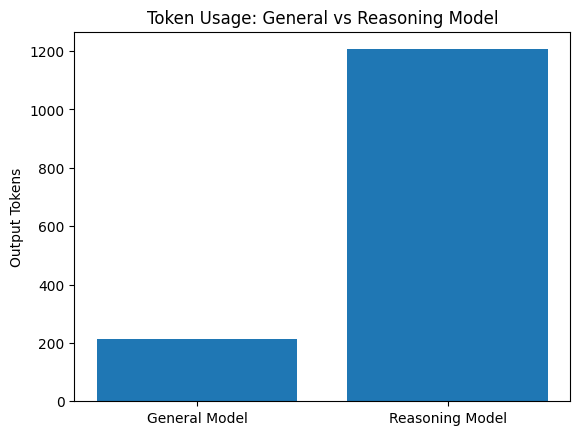

In [ ]:
# Compare General vs Reasoning LLMs on a chemistry stoichiometry problem
# and plot their token usage.

from openai import OpenAI
import matplotlib.pyplot as plt
import time # Import time module

client = OpenAI()

chem_prompt = """
Solve fully:

Reaction: 2 Al + Fe2O3 -> 2 Fe + Al2O3

Given 5.40 g Al and 15.9 g Fe2O3:
1) Identify the limiting reagent.
2) Compute theoretical yield of Fe (grams, 100% yield).
3) If actual Fe collected is 7.00 g, compute percent yield.

Molar masses (g/mol): Al 26.9815, Fe 55.845, O 15.999.
Return JSON with keys: limiting, grams_fe, percent_yield, and steps (array of strings).
"""

# ---- General Model ----
start_time_gen = time.time() # Start timer
gen = client.responses.create(
    model="gpt-3.5-turbo",
    input=chem_prompt,
    temperature=0.2,
)
end_time_gen = time.time() # End timer
gen_time = end_time_gen - start_time_gen # Calculate time taken

print("=== General Model ===")
print(gen.output_text)
print(f"Time taken for General Model: {gen_time:.2f} seconds") # Display time taken

# ---- Reasoning Model ----
start_time_rea = time.time() # Start timer
rea = client.responses.create(
    model="o3-mini",
    input=chem_prompt,
    reasoning={"effort": "medium", "summary": "auto"},
)
end_time_rea = time.time() # End timer
rea_time = end_time_rea - start_time_rea # Calculate time taken

print("\n=== Reasoning Model ===")
print(rea.output_text)
print(f"Time taken for Reasoning Model: {rea_time:.2f} seconds") # Display time taken

# ---- Plot token usage ----
gen_tokens = gen.usage.output_tokens if gen.usage else 0
rea_tokens = rea.usage.output_tokens if rea.usage else 0

plt.bar(["General Model", "Reasoning Model"], [gen_tokens, rea_tokens])
plt.ylabel("Output Tokens")
plt.title("Token Usage: General vs Reasoning Model")
plt.show()

What are the difference between Reasoning Models and General Models?

In [ ]:
from IPython.display import IFrame

IFrame("https://openai.com/index/learning-to-reason-with-llms/", width="100%", height=500)


## [Prompting Technique3]⚖️ Zero-Shot / Few-shot Prompting

	•	Zero-shot prompting means you ask an AI model to do a task without giving it examples—just a clear instruction and the necessary context.
	•	Few-shot prompting means you add 1–3 tiny examples to show the model the kind of answer you want.

In [ ]:
# --- Zero-Shot Prompting Example (Chemistry) ---

zero_shot_prompt = "Explain the concept of electronegativity in chemistry."
zero_shot_answer = ask_llm(zero_shot_prompt)

print("--- Zero-Shot Prompt ---")
print(f"Prompt: {zero_shot_prompt}\n")
print(f"Answer:\n{zero_shot_answer}\n")


# --- Few-Shot Prompting Example (Chemistry) ---

few_shot_prompt = """
Explain the following chemical concepts in one sentence each:

Concept: Atomic Number
Explanation: The number of protons in the nucleus of an atom.

Concept: Mass Number
Explanation: The total number of protons and neutrons in the nucleus of an atom.

Concept: Isotope
Explanation: Atoms of the same element with the same number of protons but different numbers of neutrons.

Concept: Molarity
Explanation:
"""

few_shot_answer = ask_llm(few_shot_prompt)

print("--- Few-Shot Prompt ---")
print(f"Prompt: {few_shot_prompt}\n")
print(f"Answer:\n{few_shot_answer}")

--- Zero-Shot Prompt ---
Prompt: Explain the concept of electronegativity in chemistry.

Answer:
Electronegativity is a chemical property that describes the ability of an atom to attract and hold onto electrons when it is in a bond with another atom. It is not a fixed property but rather a relative scale that varies among different elements.

The concept of electronegativity was first introduced by Linus Pauling in the 1930s and has been further refined with several scales developed since then, including the Pauling scale, the Mulliken scale, and the Allred-Rochow scale. 

Key points about electronegativity include:

1. **Scale of Electronegativity**: On the Pauling scale, fluorine is the most electronegative element, assigned a value of about 4.0. Other elements fall in a range, with values generally decreasing down the periodic table and from right to left across a period.

2. **Periodic Trends**: Electronegativity tends to increase across a period (from left to right) due to increas

## [Prompting Technique4]⚖️ Chain-of-Thought (CoT)

	•	Chain-of-thought (CoT) prompting asks an AI to show a short, structured path from data → conclusion (not just the final answer).
	•	In this tutorial we use field-shorthand (labeled lines like Task, Data, Output format) to request a concise, auditable set of steps—think “worked-solution outline,” not a rambling monologue.

In [ ]:
from IPython.display import IFrame

IFrame("https://www.promptingguide.ai/techniques/cot", width="100%", height=500)


In [ ]:
# --- Chain-of-Thought (CoT) Prompting Example (Chemistry Stoichiometry) ---

cot_prompt = """
Task: Solve the following stoichiometry problem step-by-step and provide the final answer.
Data:
Reaction: 2 Al + Fe2O3 -> 2 Fe + Al2O3
Given: 5.40 g Al and 15.9 g Fe2O3
Molar masses (g/mol): Al 26.9815, Fe 55.845, O 15.999.
Output format:
Steps:
1. ...
2. ...
...
Final Answer: ...
"""

cot_answer = ask_llm(cot_prompt)

print("--- Chain-of-Thought Prompt ---")
print(f"Prompt:\n{cot_prompt}\n")
print(f"Answer:\n{cot_answer}\n")

# --- Zero-Shot Prompting Example (Chemistry Stoichiometry) ---
zero_shot_prompt = """
Solve the following stoichiometry problem and provide the final answer:

Reaction: 2 Al + Fe2O3 -> 2 Fe + Al2O3

Given 5.40 g Al and 15.9 g Fe2O3:
1) Identify the limiting reagent.
2) Compute theoretical yield of Fe (grams, 100% yield).
3) If actual Fe collected is 7.00 g, compute percent yield.

Molar masses (g/mol): Al 26.9815, Fe 55.845, O 15.999.
Return only the final answers for limiting reagent, theoretical yield of Fe (grams), and percent yield.
"""

zero_shot_answer = ask_llm(zero_shot_prompt)

print("--- Zero-Shot Prompt (for comparison) ---")
print(f"Prompt:\n{zero_shot_prompt}\n")
print(f"Answer:\n{zero_shot_answer}")

--- Chain-of-Thought Prompt ---
Prompt:

Task: Solve the following stoichiometry problem step-by-step and provide the final answer.
Data:
Reaction: 2 Al + Fe2O3 -> 2 Fe + Al2O3
Given: 5.40 g Al and 15.9 g Fe2O3
Molar masses (g/mol): Al 26.9815, Fe 55.845, O 15.999.
Output format:
Steps:
1. ...
2. ...
...
Final Answer: ...


Answer:
To solve the stoichiometry problem, we need to determine the limiting reactant between aluminum (Al) and iron(III) oxide (Fe2O3), and then calculate the amount of product formed. We’ll go step-by-step.

### Step 1: Write the balanced chemical equation.
The balanced equation is:
\[ 2 \text{Al} + \text{Fe}_2\text{O}_3 \rightarrow 2 \text{Fe} + \text{Al}_2\text{O}_3 \]

### Step 2: Calculate the moles of each reactant.
First, we need to convert the mass of each reactant into moles using the molar mass.

#### For Al:
- Given mass of Al = 5.40 g
- Molar mass of Al = 26.9815 g/mol

\[
\text{Moles of Al} = \frac{5.40 \text{ g}}{26.9815 \text{ g/mol}} \approx 0.200 

## Prompt Design

The anatomy of a strong prompt (universal skeleton)

Use these fields (omit what you don’t need):

	1.	Task – the verb + deliverable
	2.	Audience – who it’s for (drives depth & tone)
	3.	Context – only the background needed to do the task
	4.	Input / Data – the text, table, conditions, etc.
	5.	Constraints – limits & rules (length, no speculation, cite assumptions)


Examples:

Task: Solve the equation step by step.
Context: High school algebra level.
Input/Data: 2x + 5 = 15.
Constraints: Show ≤3 steps; include final answer.
Output format: Numbered steps → final boxed answer.


## ✍️ Exercise (Your Turn)

Design and test prompts of different types. For each, write your own chemistry-related question, then run it through the model and refine as needed.

	1.	Zero-Shot Prompt
	•	Write a single clear instruction (no examples).
	•	Example starter: “Summarize the reaction conditions for a Grignard synthesis in 3 bullet points.”


	2.	Few-Shot Prompt
	•	Provide 1–2 examples first, then add your own input.
	•	Example starter: “Given NMR peaks, match them to groups. Example: … Now for: δ 7.2 (d, 2H)…”


	3.	Chain-of-Thought Prompt
	•	Ask the model to show reasoning steps, not just the answer.
	•	Example starter: “Calculate the theoretical yield step by step (≤5 steps).”


	4.	Reflection Prompt
	•	Ask the model to check or critique its own answer.
	•	Example starter: “Solve for the pH of 0.1 M HCl, then reflect: is your reasoning consistent?”


	5.	“Good Prompt” (your design)
	•	Use the Task, Context, Input, Constraints, Output format structure we practiced.
	•	Example starter: “Compare ethanol and methanol boiling points. Task: compare. Context: physical properties. Constraints: ≤60 words. Output: bullet list.”

  
	6.	Final Post
	•	Write one chemistry question you would personally like to ask an LLM (something you are curious about).
	•	Post it along with your designed prompt.


In [ ]:

prompt_box = widgets.Textarea(
    placeholder="Type your chemistry question here (e.g., Why does salt dissolve in water?)",
    layout=widgets.Layout(width="100%", height="90px")
)
model_picker = widgets.Dropdown(
    options=[("gpt-4o-mini (fast)", "gpt-4o-mini"),
             ("gpt-4o (quality)", "gpt-4o"),
             ("gpt-3.5-turbo (legacy)", "gpt-3.5-turbo")],
    value="gpt-4o-mini",
    description="Model:"
)
run_btn = widgets.Button(description="Ask", button_style="primary")
exercise_out = widgets.Output()

def on_run(_):
    exercise_out.clear_output()
    user_q = prompt_box.value.strip()
    if not user_q:
        with exercise_out:
            display(Markdown("*Please type a question above.*"))
        return
    with exercise_out:
        display(Markdown("⏳ Asking the model..."))
    ans = ask_llm(user_q, model=model_picker.value)
    exercise_out.clear_output()
    with exercise_out:
        display(Markdown(f"**Q:** {user_q}\n\n**A:**\n\n{ans}"))

run_btn.on_click(on_run)
display(widgets.VBox([prompt_box, model_picker, run_btn, exercise_out]))



## 📘 Reflection (Discuss / Note Down)
- Did the answer include anything you would **double-check** in a trusted source (textbook, PubChem, literature)?  
- What small change to your **prompt** improved the answer the most?  
- If the model gave a **numerical property**, how would you verify it?



## 🛠️ Troubleshooting
- If buttons don’t appear or do nothing, **Runtime → Restart runtime** and re-run the Setup cell.
- If you see `API error`, double-check your **API key** and internet connection.
- If you have **no key**, you will see a *demo placeholder* answer instead of a real model response.


In [ ]:

print("Has API key? ", "✅" if "OPENAI_API_KEY" in os.environ else "❌")
try:
    import openai  # confirm package presence
    print("openai package import: ✅")
except Exception as e:
    print("openai package import: ❌", e)


Has API key?  ✅
openai package import: ✅
